In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the data
df = pd.read_csv('07 - FAZ_POEMS_REVIEW - Entity_extractions of Exact_search.csv', sep=',')  # Adjust separator if needed

# Clean up column names by stripping whitespace
df.columns = df.columns.str.strip()

print("Cleaned column names:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

# Define the correct column names based on your sample
expected_columns = {
    'poem_id': 'poem_id',
    'Row_ID': 'Row_ID', 
    'Title_cleaned': 'Title_cleaned',
    'sentiments': 'sentiments',
    'أماكن': 'أماكن',
    'أحداث': 'أحداث',
    'دين': 'دين',
    'مواضيع': 'مواضيع',
    'البحر': 'البحر',
    'قافية': 'قافية',
    'روي': 'روي',
    'تصنيف': 'تصنيف'
}

# Function to find the actual column names in the dataframe
def find_column(actual_df, expected_name):
    for col in actual_df.columns:
        if expected_name.strip() == col.strip():
            return col
    return None

# Find actual column names
poem_id_col = find_column(df, 'poem_id')
row_id_col = find_column(df, 'Row_ID')
title_col = find_column(df, 'Title_cleaned')
sentiment_col = find_column(df, 'sentiments')
place_col = find_column(df, 'أماكن')
event_col = find_column(df, 'أحداث')
religion_col = find_column(df, 'دين')
topic_col = find_column(df, 'مواضيع')
meter_col = find_column(df, 'البحر')
rhyme_col = find_column(df, 'قافية')
rhythm_col = find_column(df, 'روي')
classification_col = find_column(df, 'تصنيف')

print(f"\nColumn mapping:")
print(f"poem_id: {poem_id_col}")
print(f"Row_ID: {row_id_col}")
print(f"Title_cleaned: {title_col}")
print(f"sentiments: {sentiment_col}")
print(f"أماكن: {place_col}")
print(f"أحداث: {event_col}")
print(f"دين: {religion_col}")
print(f"مواضيع: {topic_col}")
print(f"البحر: {meter_col}")
print(f"قافية: {rhyme_col}")
print(f"روي: {rhythm_col}")
print(f"تصنيف: {classification_col}")

# Analysis function with error handling
def analyze_column_distribution(df, col_name, display_name):
    """Analyze distribution of a categorical column"""
    actual_col = find_column(df, col_name)
    if actual_col and actual_col in df.columns:
        print(f"\n{display_name} Distribution:")
        value_counts = df[actual_col].value_counts(dropna=False)
        print(value_counts.head(10))
        return value_counts
    else:
        print(f"\nColumn '{col_name}' not found in the dataset")
        return pd.Series(dtype='object')

# Perform analysis
if poem_id_col:
    # Group by poem_id to see poem-level statistics
    poem_stats = df.groupby(poem_id_col).agg({
        row_id_col if row_id_col else df.columns[1]: 'count',  # Use Row_ID or fallback to second column
        title_col if title_col else df.columns[5]: 'first',    # Use Title_cleaned or fallback to sixth column
        poem_id_col: 'first'
    }).rename(columns={row_id_col if row_id_col else df.columns[1]: 'line_count'})
    
    print(f"\nPoem line counts:\nMin: {poem_stats['line_count'].min()}\nMax: {poem_stats['line_count'].max()}\nMean: {poem_stats['line_count'].mean():.2f}")
else:
    print("poem_id column not found - cannot group by poem")

# Analyze various columns
analyze_column_distribution(df, 'sentiments', 'Sentiments')
analyze_column_distribution(df, 'أماكن', 'Places (أماكن)')
analyze_column_distribution(df, 'أحداث', 'Events (أحداث)')
analyze_column_distribution(df, 'دين', 'Religious Content (دين)')
analyze_column_distribution(df, 'مواضيع', 'Topics (مواضيع)')
analyze_column_distribution(df, 'البحر', 'Poetic Meter (البحر)')
analyze_column_distribution(df, 'قافية', 'Rhyme (قافية)')
analyze_column_distribution(df, 'روي', 'Rhythm (روي)')
analyze_column_distribution(df, 'تصنيف', 'Classification (تصنيف)')

# Sentiment analysis summary (if column exists)
actual_sentiment_col = find_column(df, 'sentiments')
if actual_sentiment_col and actual_sentiment_col in df.columns:
    print("\nDetailed Sentiment Analysis:")
    all_sentiments = []
    for sent in df[actual_sentiment_col].dropna():
        if isinstance(sent, str):
            # Handle multiple sentiments in one cell
            multi_sents = [s.strip() for s in str(sent).split(',')]
            all_sentiments.extend([s for s in multi_sents if s])  # Remove empty strings
    
    if all_sentiments:
        sentiment_freq = Counter(all_sentiments)
        print("Top 15 sentiments:", dict(sentiment_freq.most_common(15)))

# Summary report
print("\n" + "="*60)
print("SUMMARY REPORT")
print("="*60)
if poem_id_col:
    print(f"Total poems: {df[poem_id_col].nunique()}")
print(f"Total lines: {len(df)}")
if poem_id_col and row_id_col:
    print(f"Average lines per poem: {len(df)/df[poem_id_col].nunique():.2f}" if poem_id_col in df.columns else "Cannot calculate - no poem_id")
actual_classification_col = find_column(df, 'تصنيف')
if actual_classification_col:
    print(f"Poem classifications: {df[actual_classification_col].nunique()} types")
actual_sentiment_col = find_column(df, 'sentiments')
if actual_sentiment_col:
    print(f"Unique sentiments: {df[actual_sentiment_col].nunique()}")
actual_meter_col = find_column(df, 'البحر')
if actual_meter_col:
    print(f"Poetic meters (البحر): {df[actual_meter_col].nunique()}")

Cleaned column names:
0: 'poem_id'
1: 'Row_ID'
2: 'Title_raw'
3: 'Poem_line_raw'
4: 'summary'
5: 'Title_cleaned'
6: 'Poem_line_cleaned'
7: 'قافية'
8: 'روي'
9: 'البحر'
10: 'وصل'
11: 'حركة'
12: 'شخص'
13: 'sentiments'
14: 'أماكن'
15: 'أحداث'
16: 'دين'
17: 'مواضيع'
18: 'تصنيف'

Column mapping:
poem_id: poem_id
Row_ID: Row_ID
Title_cleaned: Title_cleaned
sentiments: sentiments
أماكن: أماكن
أحداث: أحداث
دين: دين
مواضيع: مواضيع
البحر: البحر
قافية: قافية
روي: روي
تصنيف: تصنيف

Poem line counts:
Min: 2
Max: 103
Mean: 11.97

Sentiments Distribution:
sentiments
حب      1025
فخر      833
NaN      637
حزن      508
شوق      284
حكمة     241
أمل      165
غضب      114
صبر      101
فرح       93
Name: count, dtype: int64

Places (أماكن) Distribution:
أماكن
NaN                               3202
name:الأرض,type:أراضي_إماراتية      47
name:الوطن,type:أراضي_إماراتية      27
name:دبي,type:أراضي_إماراتية        22
name:البحر,type:طبيعة_عامة          20
name:الدرب,type:أماكن_مجردة         18
name:الزمان,type:

Note: you may need to restart the kernel to use updated packages.


C:\Users\User\AppData\Local\Temp\ipykernel_21688\488919745.py:127: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


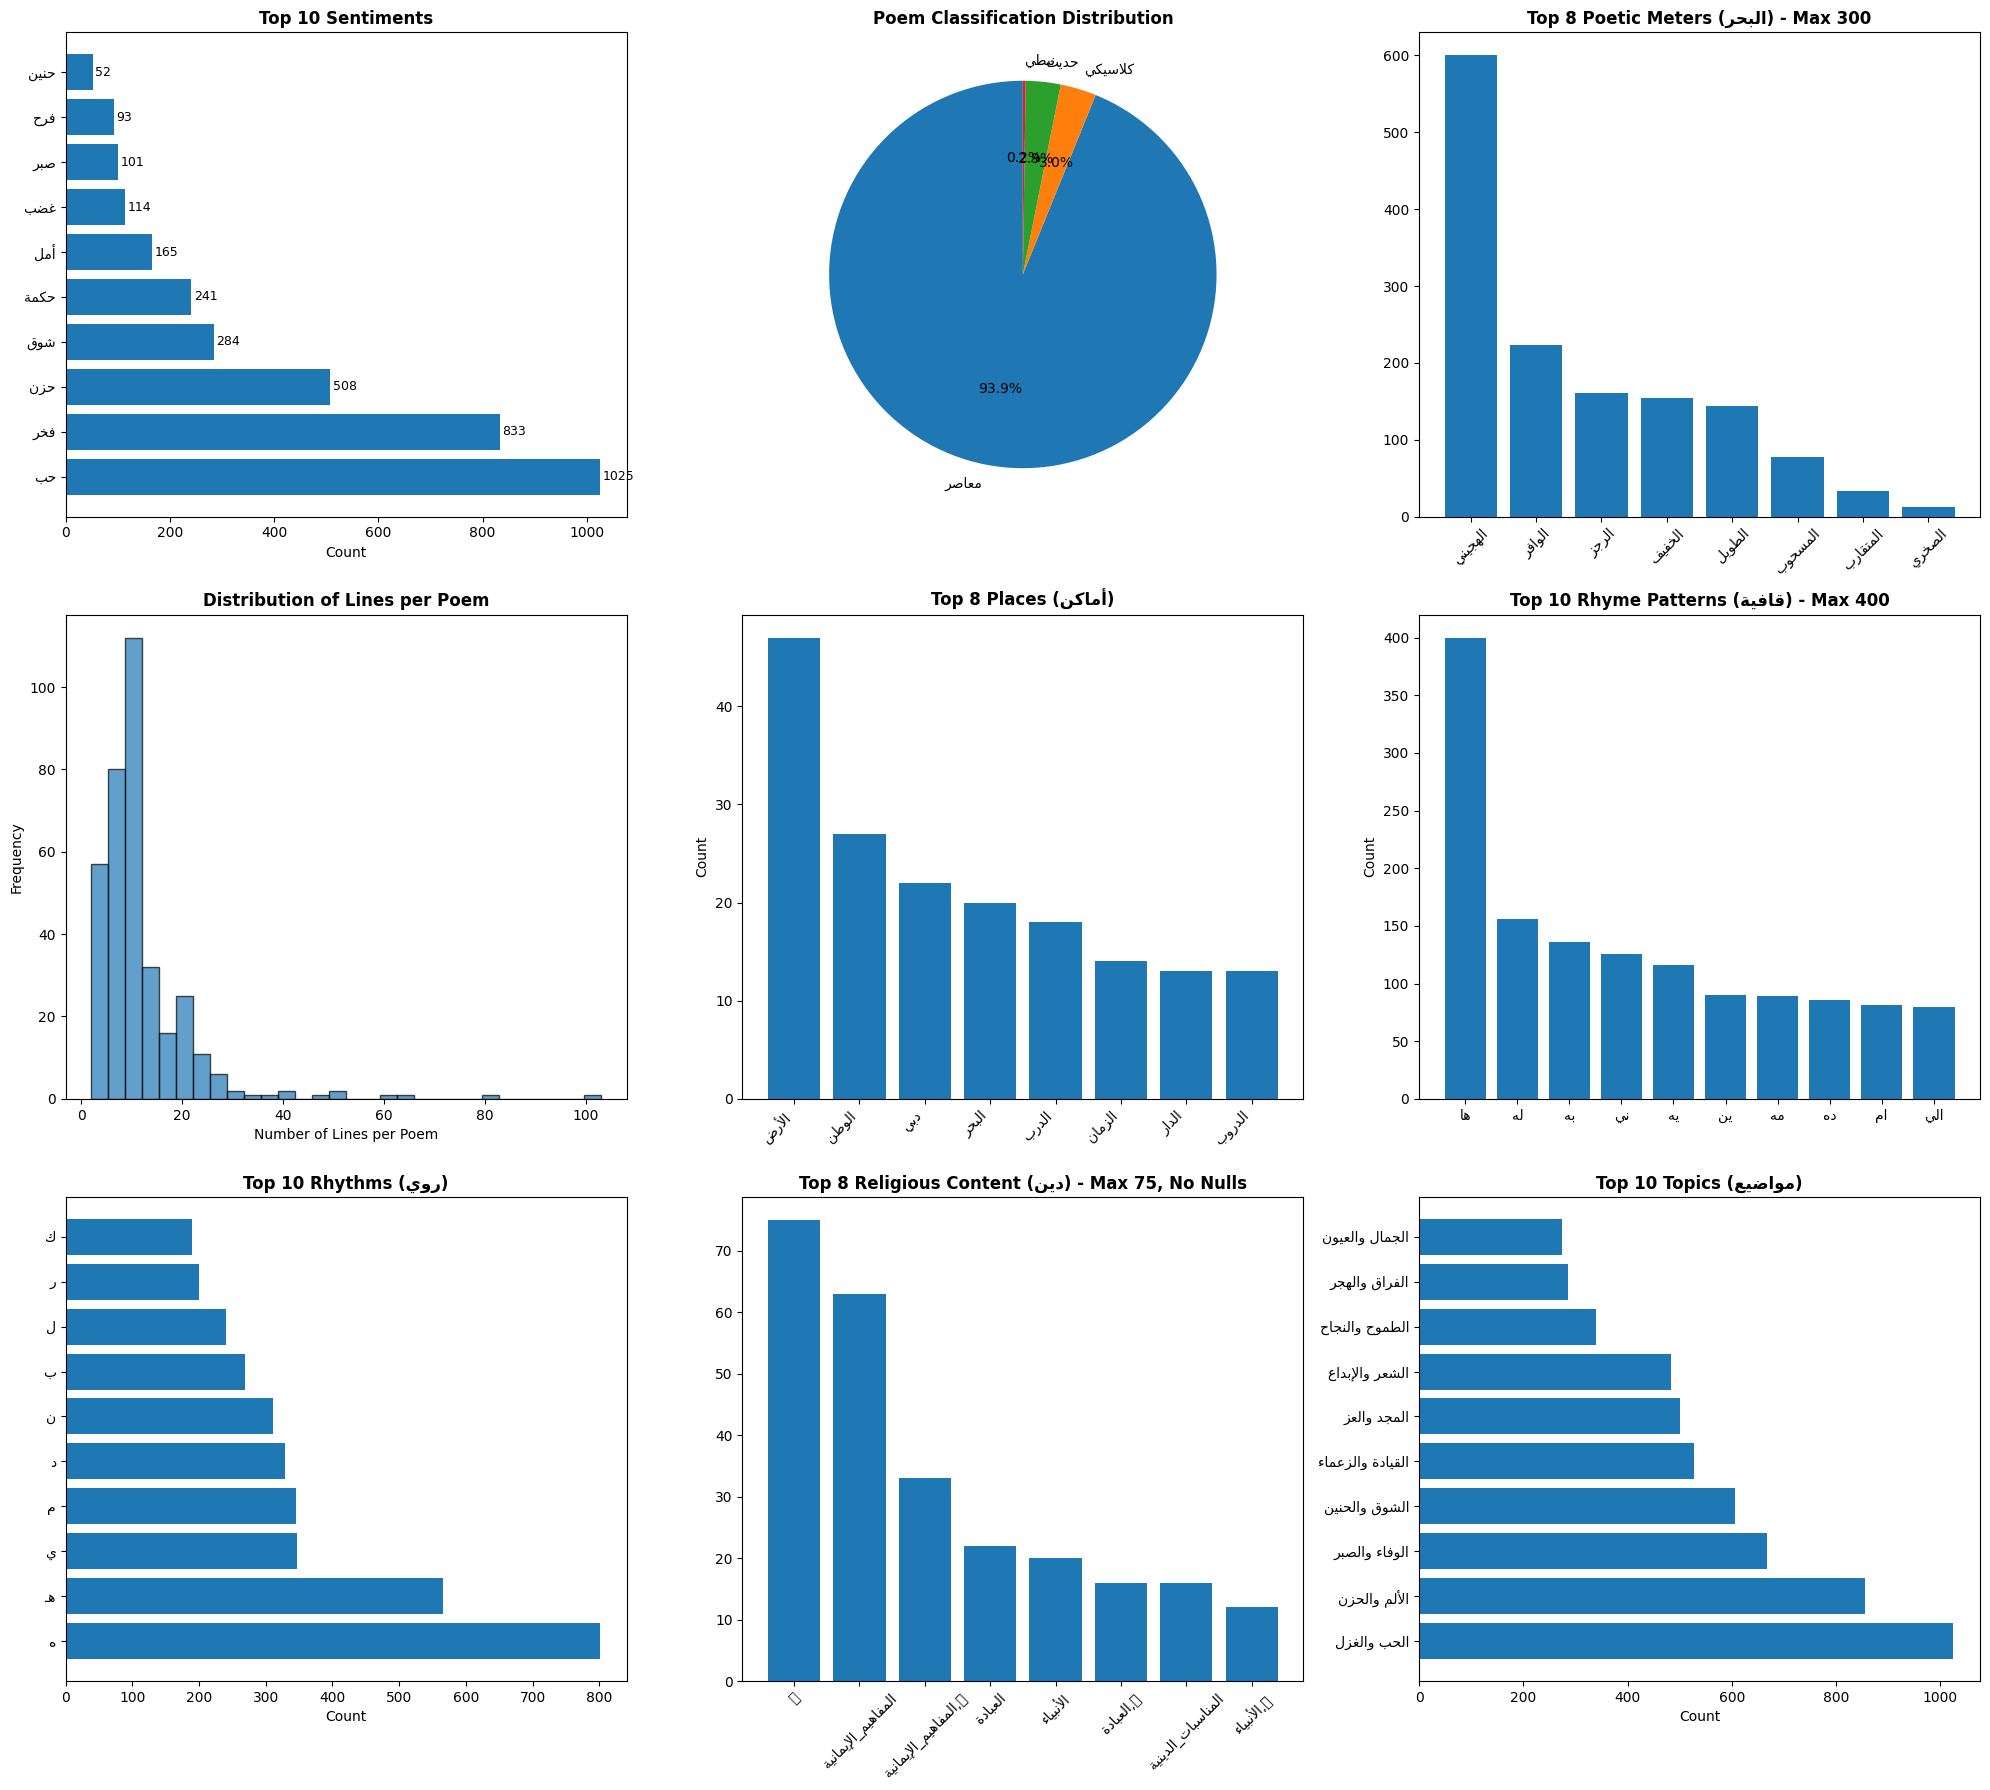

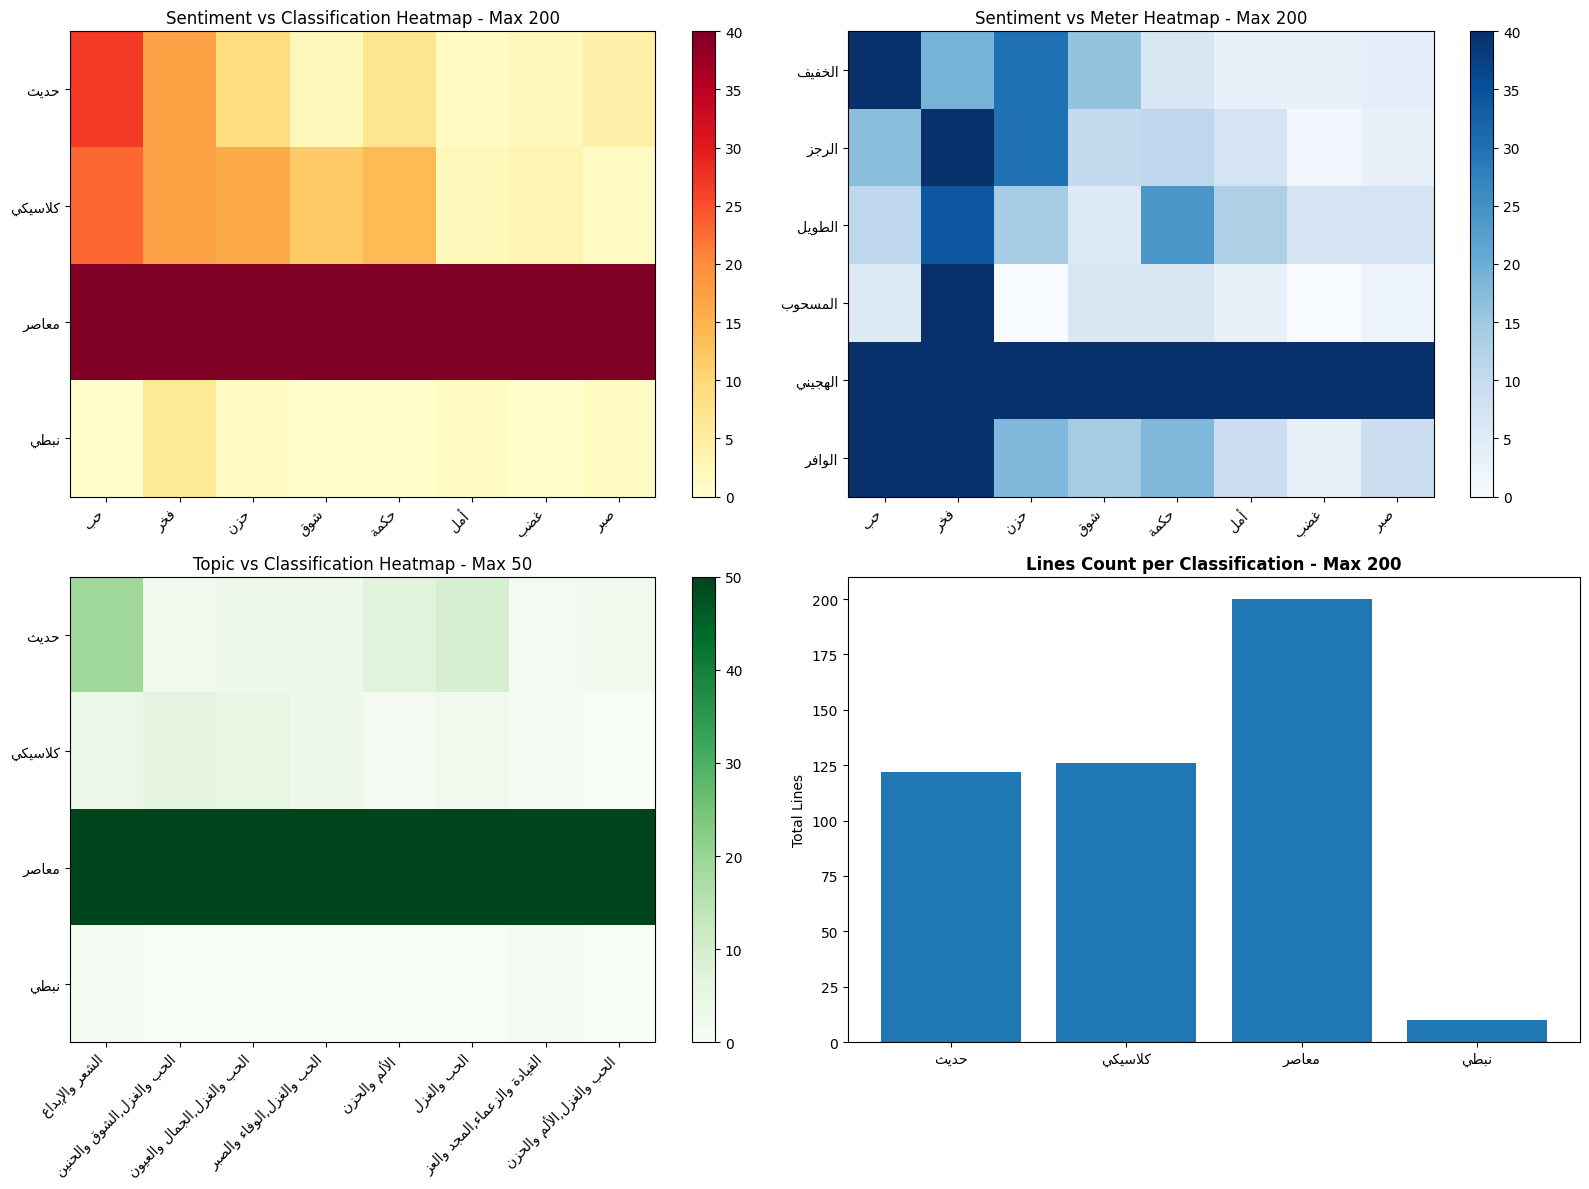

C:\Users\User\AppData\Local\Temp\ipykernel_21688\488919745.py:233: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


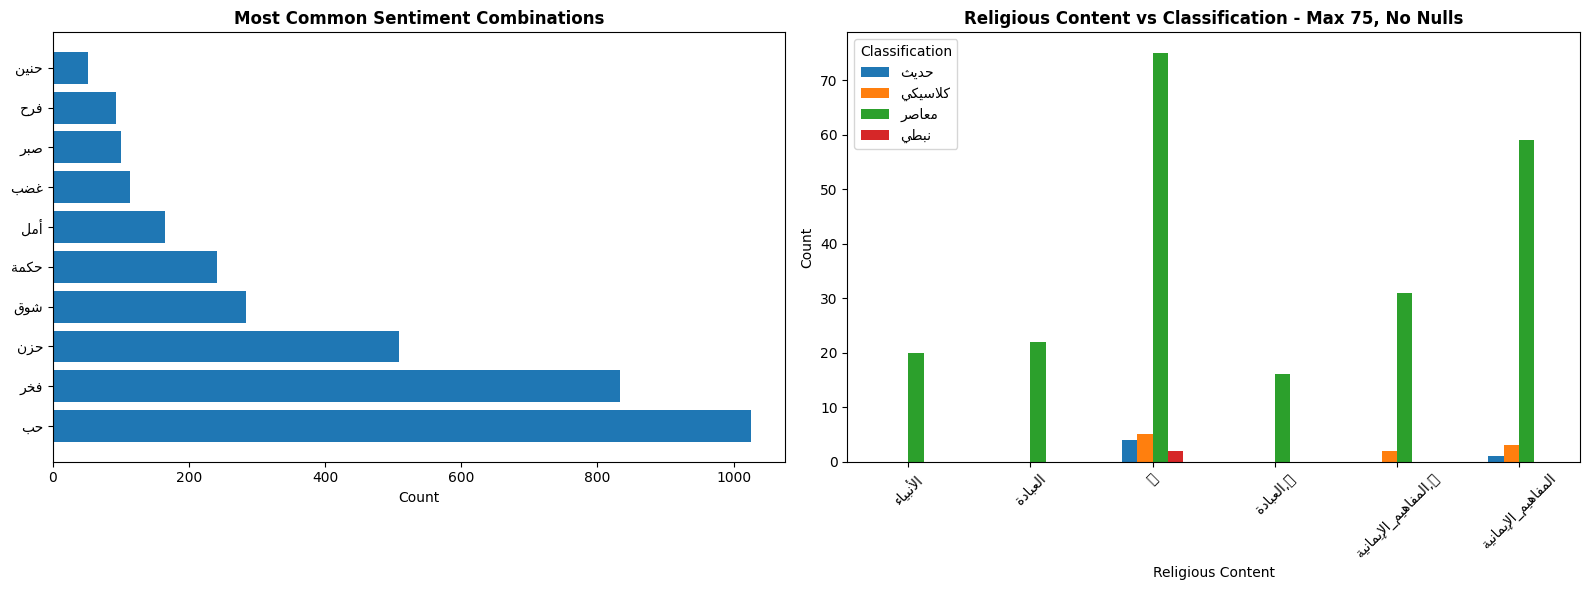


Summary Statistics Table:
           Metric       Value
      Total Poems         352
      Total Lines        4213
   Avg Lines/Poem       11.97
Unique Sentiments          40
    Unique Meters          10
  Classifications           4
  Avg Poem Length 12.0 ± 10.4


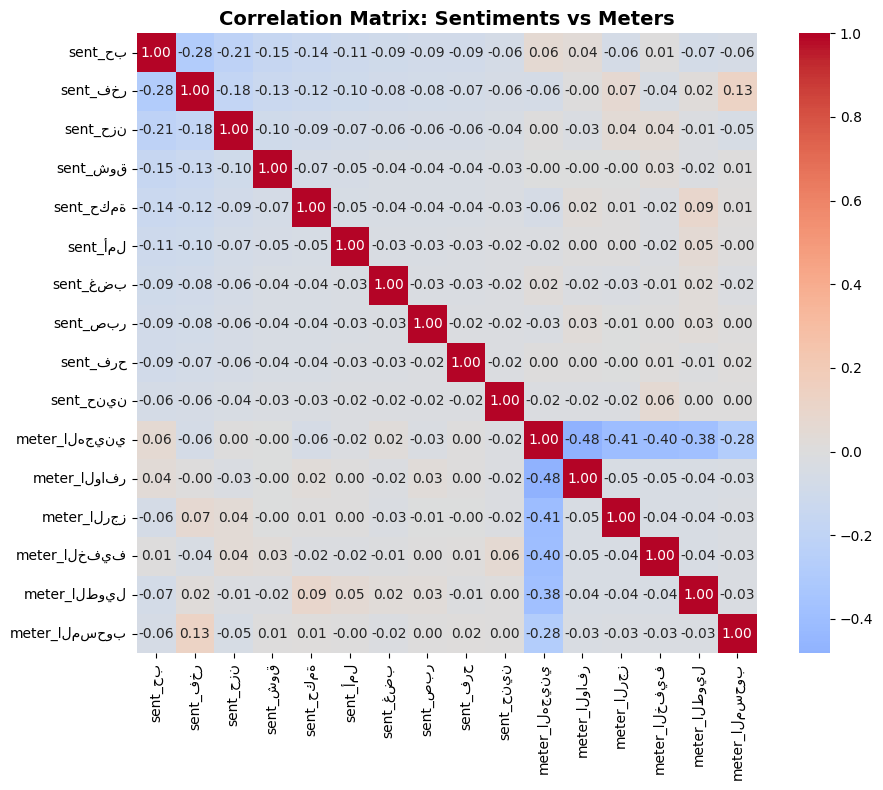

In [32]:
%pip install arabic-reshaper python-bidi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

# Function to properly display Arabic text
def display_arabic(text):
    if pd.isna(text):
        return ""
    reshaped_text = arabic_reshaper.reshape(str(text))
    return get_display(reshaped_text)

# Set a font that supports Arabic characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# 1. Top Sentiments
sentiment_counts = df['sentiments'].value_counts().dropna().head(10)
axes[0,0].barh(range(len(sentiment_counts)), sentiment_counts.values)
axes[0,0].set_yticks(range(len(sentiment_counts)))
arabic_sentiment_labels = [display_arabic(sent) for sent in sentiment_counts.index]
axes[0,0].set_yticklabels(arabic_sentiment_labels, fontsize=10)
axes[0,0].set_xlabel('Count')
title_text = display_arabic('Top 10 Sentiments')
axes[0,0].set_title(title_text, fontsize=12, fontweight='bold')
for i, v in enumerate(sentiment_counts.values):
    axes[0,0].text(v + 5, i, str(v), va='center', fontsize=9)

# 2. Poem Classification Distribution
class_counts = df['تصنيف'].value_counts()
arabic_class_labels = [display_arabic(cls) for cls in class_counts.index]
axes[0,1].pie(class_counts.values, labels=arabic_class_labels, autopct='%1.1f%%', startangle=90)
title_text = display_arabic('Poem Classification Distribution')
axes[0,1].set_title(title_text, fontsize=12, fontweight='bold')

# 3. Poetic Meters Distribution (max 300)
meter_counts = df['البحر'].value_counts().head(8)
capped_meter_values = [min(val, 600) for val in meter_counts.values]
arabic_meter_labels = [display_arabic(meter) for meter in meter_counts.index]
axes[0,2].bar(arabic_meter_labels, capped_meter_values)
title_text = display_arabic('Top 8 Poetic Meters (البحر) - Max 300')
axes[0,2].set_title(title_text, fontsize=12, fontweight='bold')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Line Count Distribution per Poem
line_counts = df.groupby('poem_id')['Row_ID'].count()
axes[1,0].hist(line_counts.values, bins=30, edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Number of Lines per Poem')
axes[1,0].set_ylabel('Frequency')
title_text = display_arabic('Distribution of Lines per Poem')
axes[1,0].set_title(title_text, fontsize=12, fontweight='bold')

# 5. Top Places
place_counts = df['أماكن'].value_counts().dropna().head(8)
place_names = []
for place in place_counts.index:
    if 'name:' in str(place):
        name_part = str(place).split('name:')[1].split(',')[0]
        place_names.append(name_part)
    else:
        place_names.append(str(place)[:15])

arabic_place_labels = [display_arabic(name) for name in place_names]
axes[1,1].bar(range(len(place_counts)), place_counts.values)
axes[1,1].set_xticks(range(len(place_counts)))
axes[1,1].set_xticklabels(arabic_place_labels, rotation=45, ha='right')
title_text = display_arabic('Top 8 Places (أماكن)')
axes[1,1].set_title(title_text, fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Count')

# 6. Rhyme Pattern Distribution (max 200)
rhyme_counts = df['قافية'].value_counts().head(10)
capped_rhyme_values = [min(val, 400) for val in rhyme_counts.values]
arabic_rhyme_labels = [display_arabic(rhyme) for rhyme in rhyme_counts.index]
axes[1,2].bar(arabic_rhyme_labels, capped_rhyme_values)
title_text = display_arabic('Top 10 Rhyme Patterns (قافية) - Max 400')
axes[1,2].set_title(title_text, fontsize=12, fontweight='bold')
axes[1,2].set_ylabel('Count')

# 7. Rhythm Distribution
rhythm_counts = df['روي'].value_counts().head(10)
arabic_rhythm_labels = [display_arabic(rhythm) for rhythm in rhythm_counts.index]
axes[2,0].barh(arabic_rhythm_labels, rhythm_counts.values)
title_text = display_arabic('Top 10 Rhythms (روي)')
axes[2,0].set_title(title_text, fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Count')

# 8. Religious Content Distribution (max 75, exclude null/[])
religion_counts = df['دين'].value_counts()
religion_counts = religion_counts[religion_counts.index != 'NaN']
religion_counts = religion_counts[religion_counts.index != '']
religion_counts = religion_counts[religion_counts.index != 'nan']
religion_counts = religion_counts.head(8)

capped_religion_values = [min(val, 75) for val in religion_counts.values]
arabic_religion_labels = [display_arabic(rel) for rel in religion_counts.index]
axes[2,1].bar(arabic_religion_labels, capped_religion_values)
title_text = display_arabic('Top 8 Religious Content (دين) - Max 75, No Nulls')
axes[2,1].set_title(title_text, fontsize=12, fontweight='bold')
axes[2,1].tick_params(axis='x', rotation=45)

# 9. Topic Distribution - Split comma-separated topics
# Split topics by comma and create a new series with individual topics
all_topics = []
for topic_str in df['مواضيع'].dropna():
    if isinstance(topic_str, str):
        topics = [t.strip() for t in topic_str.split(',')]
        all_topics.extend(topics)
    else:
        all_topics.append(topic_str)

# Count individual topics
topic_series = pd.Series(all_topics)
topic_counts = topic_series.value_counts().head(10)
arabic_topic_labels = [display_arabic(topic) for topic in topic_counts.index]
axes[2,2].barh(arabic_topic_labels, topic_counts.values)
title_text = display_arabic('Top 10 Topics (مواضيع)')
axes[2,2].set_title(title_text, fontsize=12, fontweight='bold')
axes[2,2].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Additional Advanced Visualizations
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))

# ABR Chart 1: Sentiment vs Classification (max 200)
pivot_sentiment_class = df.groupby(['sentiments', 'تصنيف']).size().unstack(fill_value=0)
top_sentiments = df['sentiments'].value_counts().head(8).index
pivot_filtered = pivot_sentiment_class.loc[top_sentiments]

capped_pivot_sc = pivot_filtered.clip(upper=40)
im1 = axes2[0,0].imshow(capped_pivot_sc.T, cmap='YlOrRd', aspect='auto', interpolation='nearest')
arabic_sentiment_labels = [display_arabic(sent) for sent in pivot_filtered.index]
arabic_class_labels = [display_arabic(cls) for cls in pivot_filtered.columns]

axes2[0,0].set_xticks(range(len(pivot_filtered.index)))
axes2[0,0].set_xticklabels(arabic_sentiment_labels, rotation=45, ha='right')
axes2[0,0].set_yticks(range(len(pivot_filtered.columns)))
axes2[0,0].set_yticklabels(arabic_class_labels)
title_text = display_arabic('Sentiment vs Classification Heatmap - Max 200')
axes2[0,0].set_title(title_text)
plt.colorbar(im1, ax=axes2[0,0])

# ABR Chart 2: Meter vs Sentiment (max 200)
top_meters = df['البحر'].value_counts().head(6).index
df_meter_sentiment = df[df['البحر'].isin(top_meters)]
pivot_meter_sentiment = df_meter_sentiment.groupby(['sentiments', 'البحر']).size().unstack(fill_value=0)
top_sentiments_2 = df_meter_sentiment['sentiments'].value_counts().head(8).index
pivot_ms = pivot_meter_sentiment.loc[top_sentiments_2]

capped_pivot_ms = pivot_ms.clip(upper=40)
im2 = axes2[0,1].imshow(capped_pivot_ms.T, cmap='Blues', aspect='auto', interpolation='nearest')
arabic_sentiment_labels_2 = [display_arabic(sent) for sent in pivot_ms.index]
arabic_meter_labels_2 = [display_arabic(meter) for meter in pivot_ms.columns]

axes2[0,1].set_xticks(range(len(pivot_ms.index)))
axes2[0,1].set_xticklabels(arabic_sentiment_labels_2, rotation=45, ha='right')
axes2[0,1].set_yticks(range(len(pivot_ms.columns)))
axes2[0,1].set_yticklabels(arabic_meter_labels_2)
title_text = display_arabic('Sentiment vs Meter Heatmap - Max 200')
axes2[0,1].set_title(title_text)
plt.colorbar(im2, ax=axes2[0,1])

# ABR Chart 3: Topic vs Classification (max 50)
df_topic_class = df.groupby(['مواضيع', 'تصنيف']).size().unstack(fill_value=0)
top_topics = df['مواضيع'].value_counts().head(8).index
pivot_tc = df_topic_class.loc[top_topics]

capped_pivot_tc = pivot_tc.clip(upper=50)
im3 = axes2[1,0].imshow(capped_pivot_tc.T, cmap='Greens', aspect='auto', interpolation='nearest')
arabic_topic_labels_2 = [display_arabic(topic) for topic in pivot_tc.index]
arabic_class_labels_2 = [display_arabic(cls) for cls in pivot_tc.columns]

axes2[1,0].set_xticks(range(len(pivot_tc.index)))
axes2[1,0].set_xticklabels(arabic_topic_labels_2, rotation=45, ha='right')
axes2[1,0].set_yticks(range(len(pivot_tc.columns)))
axes2[1,0].set_yticklabels(arabic_class_labels_2)
title_text = display_arabic('Topic vs Classification Heatmap - Max 50')
axes2[1,0].set_title(title_text)
plt.colorbar(im3, ax=axes2[1,0])

# ABR Chart 4: Lines per Classification (max 200)
avg_lines_per_class = df.groupby('تصنيف').size()
capped_lines_values = [min(val, 200) for val in avg_lines_per_class.values]
arabic_class_labels_3 = [display_arabic(cls) for cls in avg_lines_per_class.index]
axes2[1,1].bar(arabic_class_labels_3, capped_lines_values)
title_text = display_arabic('Lines Count per Classification - Max 200')
axes2[1,1].set_title(title_text, fontsize=12, fontweight='bold')
axes2[1,1].set_ylabel('Total Lines')

plt.tight_layout()
plt.show()

# Create sentiment trend analysis by poem line position
fig3, axes3 = plt.subplots(1, 2, figsize=(16, 6))

# Most common sentiment combinations
sentiment_combinations = df['sentiments'].value_counts().head(10)
arabic_sent_comb_labels = [display_arabic(sent) for sent in sentiment_combinations.index]
axes3[0].barh(arabic_sent_comb_labels, sentiment_combinations.values)
title_text = display_arabic('Most Common Sentiment Combinations')
axes3[0].set_title(title_text, fontsize=12, fontweight='bold')
axes3[0].set_xlabel('Count')

# Religious content vs other categories (max 75, exclude null/[])
religion_vs_class = df[df['دين'].notna() & (df['دين'] != '') & (df['دين'] != 'NaN') & (df['دين'] != 'nan')]
religion_vs_class_grouped = religion_vs_class.groupby(['دين', 'تصنيف']).size().unstack(fill_value=0)
top_religion = religion_vs_class['دين'].value_counts().head(6).index
religion_pivot = religion_vs_class_grouped.loc[religion_vs_class_grouped.index.isin(top_religion)]

capped_religion_pivot = religion_pivot.clip(upper=75)
arabic_religion_labels_2 = [display_arabic(rel) for rel in religion_pivot.index]
capped_religion_pivot.index = arabic_religion_labels_2

# Create the plot with Arabic labels
ax = capped_religion_pivot.plot(kind='bar', ax=axes3[1])
arabic_class_labels_4 = [display_arabic(cls) for cls in capped_religion_pivot.columns]
ax.legend(arabic_class_labels_4, title=display_arabic('Classification'))

title_text = display_arabic('Religious Content vs Classification - Max 75, No Nulls')
ax.set_title(title_text, fontsize=12, fontweight='bold')
ax.set_xlabel(display_arabic('Religious Content'))
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics table as a visualization
stats_data = {
    'Metric': [
        'Total Poems',
        'Total Lines', 
        'Avg Lines/Poem',
        'Unique Sentiments',
        'Unique Meters',
        'Classifications',
        'Avg Poem Length'
    ],
    'Value': [
        df['poem_id'].nunique(),
        len(df),
        round(len(df)/df['poem_id'].nunique(), 2),
        df['sentiments'].nunique(),
        df['البحر'].nunique(),
        df['تصنيف'].nunique(),
        f"{line_counts.mean():.1f} ± {line_counts.std():.1f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
print("\nSummary Statistics Table:")
print(stats_df.to_string(index=False))

# Create a correlation heatmap for numerical relationships
fig4, ax = plt.subplots(figsize=(10, 8))
top_sentiments = df['sentiments'].value_counts().head(10).index
top_meters = df['البحر'].value_counts().head(6).index

for sent in top_sentiments:
    df[f'sent_{sent}'] = df['sentiments'].apply(lambda x: 1 if x == sent else 0)

for meter in top_meters:
    df[f'meter_{meter}'] = df['البحر'].apply(lambda x: 1 if x == meter else 0)

binary_cols = [col for col in df.columns if col.startswith(('sent_', 'meter_'))]
if len(binary_cols) > 1:
    corr_matrix = df[binary_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', ax=ax)
    title_text = display_arabic('Correlation Matrix: Sentiments vs Meters')
    ax.set_title(title_text, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Clean up temporary columns
cols_to_drop = [col for col in df.columns if col.startswith(('sent_', 'meter_'))]
df = df.drop(columns=cols_to_drop, errors='ignore')